<a href="https://colab.research.google.com/github/Simrawr/leaves/blob/main/fake_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install torch torchvision

In [14]:
import torch
print(torch.__version__)

2.0.1+cu118


In [15]:
from torchvision import datasets, transforms, models
data_dir = "ai_data/"


In [16]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/ai_data.zip

alt: !unzip data2.zip

In [21]:
train_data = datasets.ImageFolder(data_dir + '/train')
test_data = datasets.ImageFolder(data_dir + '/test')

In [22]:
train_transforms = transforms.Compose([transforms.RandomRotation(30), #data augumnetation
                                       transforms.RandomResizedCrop(224),#resize
                                       transforms.RandomHorizontalFlip(), #data augumnetation
                                       transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.RandomResizedCrop(224), #resize
                                      transforms.ToTensor()])
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=8)
dataiter = iter(train_loader)
images, classes  = next(dataiter)
print(type(images))
print(images.shape)
print(classes.shape)

<class 'torch.Tensor'>
torch.Size([8, 3, 224, 224])
torch.Size([8])


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [25]:
import torch.nn as nn
import numpy as np
class CropDetectCNN(nn.Module):
    # initialize the class and the parameters
    def __init__(self):
        super(CropDetectCNN, self).__init__()

        # convolutional layer 1 & max pool layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 2 & max pool layer 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=2),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 3 & max pool layer 3
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=3),
            nn.MaxPool2d(kernel_size=2))

        # convolutional layer 4 & max pool layer 4
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=2, stride=2),
            nn.MaxPool2d(kernel_size=2))

        #Fully connected layer
        self.fc = nn.Linear(128*2*2, 2)

    # Feed forward the network
    def forward(self, x):
        out = self.layer1(x.to(device))
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
# model = CropDetectCNN().to(device)
model.to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [26]:
print (device)

cuda


In [27]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
print(device)

cuda


if torch.cuda.is_available():
  model.cuda()

```
# This is formatted as code
```



In [30]:
print(train_data)
print(train_data.classes)

Dataset ImageFolder
    Number of datapoints: 100000
    Root location: ai_data//train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
['FAKE', 'REAL']


In [32]:
epochs = 1 # run more iterations
# if torch.cuda.is_available():
  # model.cuda()

for epoch in range(epochs):
    running_loss = 0
    for images, classes in train_loader:
        # To device - to transfrom the image and classes to CPU|GPU
        images, classes = images.to(device), classes.to(device)

        # clears old gradients from the last step
        optimizer.zero_grad()

        # train the images

        outputs = model(images)


        #calculate the loss given the outputs and the classes
        loss = criterion(outputs, classes)

        # compute the loss of every parameter
        loss.backward()

        # apply the optimizer and its parameters
        optimizer.step()

        #update the loss
        running_loss += loss.item()

    else:
        validation_loss = 0
        accuracy = 0

        # to make the model run faster we are using the gradients on the train
        with torch.no_grad():
            # specify that this is validation and not training
            model.eval()
            for images, classes in test_loader:
                # Use GPU
                images, classes = images.to(device), classes.to(device)

                # validate the images
                outputs = model(images)

                # compute validation loss
                loss = criterion(outputs, classes)

                #update loss
                validation_loss += loss.item()

                # get the exponential of the outputs
                ps = torch.exp(outputs)

                #Returns the k largest elements of the given input tensor along a given dimension.
                top_p, top_class = ps.topk(1, dim=1)

                # reshape the tensor
                equals = top_class == classes.view(*top_class.shape)

                # calculate the accuracy.
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # change the mode to train for the next epochs
        model.train()
        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Valid Loss: {:.3f}.. ".format(validation_loss/len(test_loader)),
              "Valid Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/1..  Training Loss: 0.356..  Valid Loss: 0.407..  Valid Accuracy: 0.816


In [33]:
print(torch.cuda.is_available())

True


In [34]:
model.class_to_idx = train_data.class_to_idx
model.class_to_idx.items()

dict_items([('FAKE', 0), ('REAL', 1)])

In [35]:
from PIL import Image
import numpy as np
# Plot the image
def imshow(image_numpy_array):
    fig, ax = plt.subplots()

    # convert the shape from (3, 256, 256) to (256, 256, 3)
    image = image_numpy_array.transpose(0, 1, 2)
    ax.imshow(image)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
def process_image(image_path):

    test_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                         transforms.ToTensor()])

    im = Image.open(image_path)
    imshow(np.array(im))
    im = test_transform(im)
    return im

In [36]:
def predict(image, model):
    # we have to process the image as we did while training the others
    image = process_image(image)

    #returns a new tensor with a given dimension
    image_input = image.unsqueeze(0)

    # Convert the image to either gpu|cpu
    image_input.to(device)

    # Pass the image through the model
    outputs = model(image_input).to(device)
    ps = torch.exp(outputs)

    # return the top 5 most predicted classes
    top_p, top_cls = ps.topk(5, dim=1)
    # convert to numpy, then to list
    top_cls = top_cls.detach().cpu().numpy().tolist()[0]

    # covert indices to classes
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}

    top_cls = [idx_to_class[top_class] for top_class in top_cls]

    return top_p, top_cls

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_solution(image_path, ps, classes):
    plt.figure(figsize = (6,10))

    image = process_image(image_path)
    plt.subplot(2,1,2)
    sns.barplot(x=ps, y=classes, color=sns.color_palette()[2]);
    plt.show()

RuntimeError: ignored

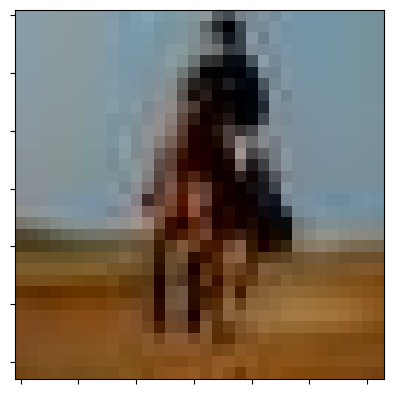

In [41]:
image = "ai_data/train/FAKE/1000 (8).jpg"
ps, classes = predict(image, model)
ps = ps.detach().cpu().numpy().tolist()[0]
print(ps)
print(classes)
plot_solution(image, ps, classes)